In [2]:
#import libraries
import pickle
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt  
%matplotlib inline
from sklearn.model_selection import train_test_split  
from sklearn.svm import SVC 
from sklearn.metrics import classification_report, confusion_matrix , accuracy_score
from sklearn.neighbors import KNeighborsClassifier

In [3]:
f = open('data/processed/data2011.pkl', 'rb')

In [4]:
data2011=pickle.load(f)

In [5]:
f.close()

In [6]:
#this is the dataframe derived from the Markov chain based on baseball
data2011

trans3,0:0,0:0X,0:1,0:2,0:3,0X:0X,0X:0XX,0X:1X,0X:2X,0X:3X,...,3X:3X,3X:3XX,3XX:0XX,3XX:0XXX,3XX:13XX,3XX:1XX,3XX:1XXX,3XX:2XX,3XX:3XX,3XX:3XXX
home_team,,,,,,,,,,,,,,,,,,,,,
ANA,0.022427,0.693931,0.239446,0.039578,0.004617,0.026786,0.683929,0.238393,0.046429,0.004464,...,0.000000,0.293103,0.009174,0.000000,0.146789,0.100917,0.000000,0.064220,0.018349,0.660550
ARI,0.028648,0.674217,0.237841,0.053298,0.005996,0.033606,0.684832,0.225250,0.052679,0.003633,...,0.013158,0.328947,0.080808,0.000000,0.171717,0.161616,0.000000,0.020202,0.010101,0.555556
ATL,0.030245,0.679537,0.230373,0.052767,0.007079,0.022381,0.686661,0.247090,0.039391,0.004476,...,0.021739,0.239130,0.000000,0.000000,0.133333,0.200000,0.000000,0.016667,0.000000,0.650000
BAL,0.025243,0.684790,0.234951,0.053074,0.001942,0.033943,0.691036,0.233246,0.040035,0.001741,...,0.015625,0.281250,0.066667,0.013333,0.186667,0.093333,0.000000,0.000000,0.000000,0.640000
BOS,0.033987,0.657516,0.241176,0.058824,0.008497,0.022346,0.644320,0.265363,0.062384,0.005587,...,0.000000,0.305556,0.025424,0.008475,0.177966,0.127119,0.000000,0.101695,0.000000,0.559322
CHA,0.023825,0.689610,0.234282,0.047651,0.004633,0.023508,0.687161,0.248644,0.038879,0.001808,...,0.028986,0.318841,0.033708,0.000000,0.179775,0.146067,0.000000,0.033708,0.011236,0.595506
CHN,0.034098,0.660984,0.249180,0.049836,0.005902,0.020716,0.682674,0.242938,0.045198,0.008475,...,0.014493,0.449275,0.029412,0.000000,0.186275,0.088235,0.000000,0.049020,0.000000,0.647059
CIN,0.042263,0.682705,0.230169,0.040312,0.004551,0.037986,0.664311,0.250883,0.042403,0.004417,...,0.000000,0.255319,0.029851,0.000000,0.134328,0.134328,0.000000,0.014925,0.000000,0.686567
CLE,0.027650,0.678736,0.235681,0.053983,0.003950,0.027125,0.697107,0.233273,0.038879,0.003617,...,0.017241,0.310345,0.042553,0.000000,0.202128,0.063830,0.000000,0.063830,0.000000,0.627660


In [7]:
data2011.index

Index(['ANA', 'ARI', 'ATL', 'BAL', 'BOS', 'CHA', 'CHN', 'CIN', 'CLE', 'COL',
       'DET', 'FLO', 'HOU', 'KCA', 'LAN', 'MIL', 'MIN', 'NYA', 'NYN', 'OAK',
       'PHI', 'PIT', 'SDN', 'SEA', 'SFN', 'SLN', 'TBA', 'TEX', 'TOR', 'WAS'],
      dtype='object', name='home_team')

In [8]:
#assign teams based on being in top ten or not, 0=non top 10, 1=top 10

top_ten = ['TEX', 'NYA', 'BOS', 'COL', 'DET', 'ARI', 'MIL', 'CIN', 'TOR', 'KCA']
answers = []

for team in data2011.index:
    if team in top_ten:
        answers.append(1)
    else:
        answers.append(0)

#create new column of results
data2011['top_ten'] = answers

In [9]:
data2011['top_ten'].head()

home_team
ANA    0
ARI    1
ATL    0
BAL    0
BOS    1
Name: top_ten, dtype: int64

## Support Vector Machine Classification

In [14]:
X = data2011.drop('top_ten', axis=1)  
y = data2011['top_ten'] 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20) 

In [15]:
#using linear parameter
svclassifier = SVC(kernel='linear')  
svclassifier.fit(X_train, y_train) 

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='linear', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [16]:
y_pred = svclassifier.predict(X_test)

In [28]:
print(confusion_matrix(y_test, y_pred))  

[[5 1]
 [1 1]]


In [29]:
print(classification_report(y_test, y_pred)) 

              precision    recall  f1-score   support

           0       0.83      0.83      0.83         6
           1       0.50      0.50      0.50         2

   micro avg       0.75      0.75      0.75         8
   macro avg       0.67      0.67      0.67         8
weighted avg       0.75      0.75      0.75         8



In [30]:
print(f"The accuracy score is {accuracy_score(y_test, y_pred)}")

The accuracy score is 0.75


In [ ]:
#Decision Tree Clsssification
from sklearn.tree import DecisionTreeClassifier 

In [ ]:
ct = DecisionTreeClassifier() # Check out all the
                              # hyperparameter options here!

dt_mod = ct.fit(data2011.drop('top_ten', axis=1), data2011['top_ten'])
dt_mod.score(data2011.drop('top_ten', axis=1), data2011['top_ten'])

In [ ]:
X2 = data2011.drop('top_ten', axis=1)  
y2 = data2011['top_ten'] 
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2) 

In [ ]:
criteria = ['gini', 'entropy'] 
scores = []
  
for c in criteria: 
    dt = DecisionTreeClassifier(criterion = c) 
    dt.fit(X2_train, y2_train) 
    test_score = dt.score(X2_test, y2_test) 
    scores = test_score 

print(scores) 

## KNN classifier

In [31]:
X = data2011.drop('top_ten', axis=1)  
y = data2011['top_ten'] 

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [33]:
knn = KNeighborsClassifier(n_neighbors=3)

In [34]:
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=3, p=2,
           weights='uniform')

In [35]:
y_pred = knn.predict(X_test)

In [36]:
# calculate accuracy
from sklearn import metrics
print('Accuracy:' + str(metrics.accuracy_score(y_test, y_pred)))
print('F1: ' + str(metrics.f1_score(y_test, y_pred)))

Accuracy:0.75
F1: 0.5


In [37]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.83      0.83      0.83         6
           1       0.50      0.50      0.50         2

   micro avg       0.75      0.75      0.75         8
   macro avg       0.67      0.67      0.67         8
weighted avg       0.75      0.75      0.75         8



In [38]:
#F1 score 
#to find optimal k
k_range = list(range(1, 10))
k_scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_predict = knn.predict(X_test)
    score = metrics.f1_score(y_test, y_predict, average='weighted')
    k_scores.append( score)
print(k_scores)

[0.8589743589743589, 0.6428571428571428, 0.75, 0.8589743589743589, 1.0, 0.8589743589743589, 0.5333333333333333, 0.5769230769230769, 0.5333333333333333]


/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


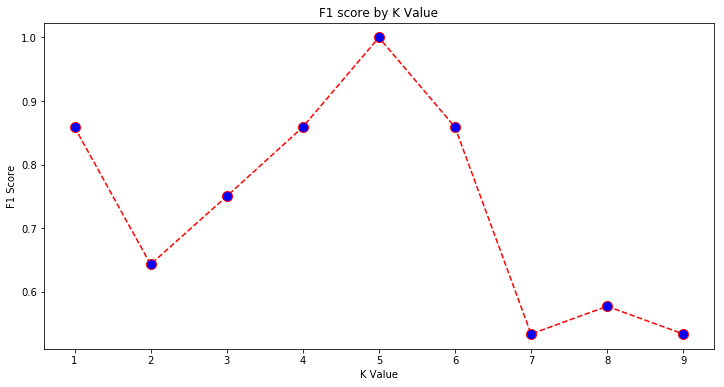

In [27]:
import matplotlib.pyplot as plt  

plt.figure(figsize=(12, 6))  
plt.plot(k_range, k_scores, color='red', linestyle='dashed', marker='o',  
         markerfacecolor='blue', markersize=10)
plt.title('F1 score by K Value')  
plt.xlabel('K Value')  
plt.ylabel('F1 Score') 
plt.show()

In [53]:
#Random Forest
# First running a random forest on our actual data
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier()
from sklearn.metrics import accuracy_score, f1_score

In [54]:
clf

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [55]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=23)

In [56]:
clf.fit(X_train, y_train)

/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [57]:
clf_pred = clf.predict(X_test)

# checking accuracy
print('Test Accuracy score: ', accuracy_score(y_test, clf_pred))

# checking accuracy
print('Test F1 score: ', f1_score(y_test, clf_pred))

Test Accuracy score:  0.5
Test F1 score:  0.0


/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


In [ ]:
#PCA classification
from sklearn.decomposition import PCA

In [63]:
pca = PCA(0.99)
principal_components  = pca.fit_transform(features_X)

PC1_train, PC2_train = X_pca_train[:, 0], X_pca_train[:, 1]

pca_length = len(pca.explained_variance_ratio_.cumsum())

# Plot PCA CDF
plt.figure(figsize=(15,10))
plt.scatter(range(1,pca_length+1), pca.explained_variance_ratio_.cumsum())
plt.title('Total Variance Explained by Varying Number of Principle Components', fontsize=20);
plt.xlabel(‘Number of Principle Components', fontsize=20)
plt.ylabel(‘Variance of Dataset’, fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

# Creating a PCA dataframe with all data to observe how it splits the groups
# This is needed for the following plot
PCA_df = pd.DataFrame(X_pca)
y = pd.Series(y)

PCA_df[‘target’] = y
col_labels = [‘PC’ + str(x) for x in range(1,43)]
col_labels.append(‘target’)
PCA_df.columns = col_labels
PCA_df[‘target’] = PCA_df[‘target’].astype(‘int’)

target = PCA_df[‘target’]

fig = plt.figure(figsize = (15,10))
ax = fig.add_subplot(1,1,1)
ax.set_xlabel(‘Principal Component 1’, fontsize = 15)
ax.set_ylabel(‘Principal Component 2’, fontsize = 15)
ax.set_title(‘2 component PCA’, fontsize = 20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
targets = [0, 1]
labels = [‘NOT meeting standard’, ‘Meeting Standard’]
colors = [‘orange’, ‘b’]
for target, color in zip(targets,colors):
   indicesToKeep = PCA_df[‘target’] == target
   ax.scatter(PCA_df.loc[indicesToKeep, ‘PC1’]
              , PCA_df.loc[indicesToKeep, ‘PC2’]
              , c = color
              , s = 50)
ax.legend(labels, fontsize=20, frameon=True, framealpha=1, edgecolor=‘k’)
ax.grid()

SyntaxError: invalid character in identifier (<ipython-input-63-120526f3f4c8>, line 11)